<a href="https://colab.research.google.com/github/addicted-by/predictive_analysis/blob/main/MM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accelerometer1RMS -- показывает ускорение вибрации в системе

Accelerometer2RMS

curent -- стла тока эдектрического мотора

Pressure -- давлене в системе после асоса

Temperature -- температура корпуса в цельсиях

Thermocouple -- температура жидкости в системе

Voltage -- напряжение на электрическом моторе

Flow -- показывает расход жидкости в минуту

RateRMS -- показывает расход жидкости в минуту

anomaly -- показывает анамальна точка или нет 


In [1]:
import os
import sys
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [1]:
# !unzip ./drive/MyDrive/vvv/MM/archive.zip

Archive:  ./drive/MyDrive/vvv/MM/archive.zip
  inflating: SKAB/anomaly-free/anomaly-free.csv  
  inflating: SKAB/other/11.csv       
  inflating: SKAB/other/12.csv       
  inflating: SKAB/other/13.csv       
  inflating: SKAB/other/14.csv       
  inflating: SKAB/other/15.csv       
  inflating: SKAB/other/16.csv       
  inflating: SKAB/other/17.csv       
  inflating: SKAB/other/18.csv       
  inflating: SKAB/other/19.csv       
  inflating: SKAB/other/20.csv       
  inflating: SKAB/other/21.csv       
  inflating: SKAB/other/22.csv       
  inflating: SKAB/other/23.csv       
  inflating: SKAB/other/9.csv        
  inflating: SKAB/valve1/0.csv       
  inflating: SKAB/valve1/1.csv       
  inflating: SKAB/valve1/10.csv      
  inflating: SKAB/valve1/11.csv      
  inflating: SKAB/valve1/12.csv      
  inflating: SKAB/valve1/13.csv      
  inflating: SKAB/valve1/14.csv      
  inflating: SKAB/valve1/15.csv      
  inflating: SKAB/valve1/2.csv       
  inflating: SKAB/valve1/3.csv 

In [2]:
fi = []
for root, dirs, files in os.walk("/content/SKAB/"):
    for file in files:
        if file.endswith(".csv"):
             fi.append(f'{root}/{file}')

In [25]:
fi

['/content/SKAB/other/19.csv',
 '/content/SKAB/other/22.csv',
 '/content/SKAB/other/23.csv',
 '/content/SKAB/other/11.csv',
 '/content/SKAB/other/14.csv',
 '/content/SKAB/other/12.csv',
 '/content/SKAB/other/21.csv',
 '/content/SKAB/other/9.csv',
 '/content/SKAB/other/16.csv',
 '/content/SKAB/other/13.csv',
 '/content/SKAB/other/15.csv',
 '/content/SKAB/other/17.csv',
 '/content/SKAB/other/18.csv',
 '/content/SKAB/other/20.csv',
 '/content/SKAB/valve1/3.csv',
 '/content/SKAB/valve1/1.csv',
 '/content/SKAB/valve1/2.csv',
 '/content/SKAB/valve1/4.csv',
 '/content/SKAB/valve1/5.csv',
 '/content/SKAB/valve1/11.csv',
 '/content/SKAB/valve1/14.csv',
 '/content/SKAB/valve1/12.csv',
 '/content/SKAB/valve1/9.csv',
 '/content/SKAB/valve1/7.csv',
 '/content/SKAB/valve1/13.csv',
 '/content/SKAB/valve1/15.csv',
 '/content/SKAB/valve1/0.csv',
 '/content/SKAB/valve1/6.csv',
 '/content/SKAB/valve1/8.csv',
 '/content/SKAB/valve1/10.csv',
 '/content/SKAB/valve2/3.csv',
 '/content/SKAB/valve2/1.csv',
 '/

In [5]:
anomaly_free_data = pd.read_csv('/content/SKAB/anomaly-free/anomaly-free.csv', sep=';', index_col='datetime', parse_dates=True)
valve1_data = [pd.read_csv(file, sep=';', index_col='datetime', parse_dates=True) for file in fi if 'valve1' in file]
valve2_data = [pd.read_csv(file, sep=';', index_col='datetime', parse_dates=True) for file in fi if 'valve2' in file]
other_data = [pd.read_csv(file, sep=';', index_col='datetime', parse_dates=True) for file in fi if 'other' in file]

In [12]:
anomaly_free_data.describe()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
count,9401.000000,9401.000000,9401.000000,9401.000000,9401.000000,9401.000000,9401.000000,9401.000000
mean,0.212277,0.268553,2.568057,0.111429,89.506955,28.417508,228.490887,125.140908
std,0.004728,0.004129,6.082034,0.252583,0.673482,0.757808,12.579837,1.671961
min,0.193992,0.248062,0.855284,-1.257000,88.171300,26.765800,1.036640,118.000000
25%,0.210431,0.265524,2.129540,0.054711,88.974200,27.841900,222.625000,124.000000
50%,0.212928,0.267378,2.541080,0.054711,89.380500,28.624800,228.942000,125.672000
75%,0.215262,0.271934,2.728380,0.382638,89.922400,29.068500,234.963000,126.328000
max,0.225967,0.280214,233.203000,1.366420,91.724900,29.522100,252.806000,128.353000


In [14]:
base_context = 'fivethirtyeight'

def fast_plot(data, rolling=1, alpha=0.5, figsize=(12, 4), new_figure=True, title=None, label=None):
    data = data.rolling(rolling).mean()
    with plt.style.context(base_context):
        if new_figure:
            plt.figure(figsize=figsize)
        plt.scatter(data.index, data, alpha=alpha)
        plt.plot(data.index, data, linewidth=2, label=label)
        if title is not None:
            plt.title(title)

def fast_legend(ncol=3, pos=(0.5, -0.15), fontsize=16):
    return plt.legend(loc='upper center', ncol=ncol, bbox_to_anchor=pos, fontsize=fontsize)

### ***Предварительный анализ данных***

Пропуски, шум и выбросы. Тренды для каждого сигнала на данных без анамалий.




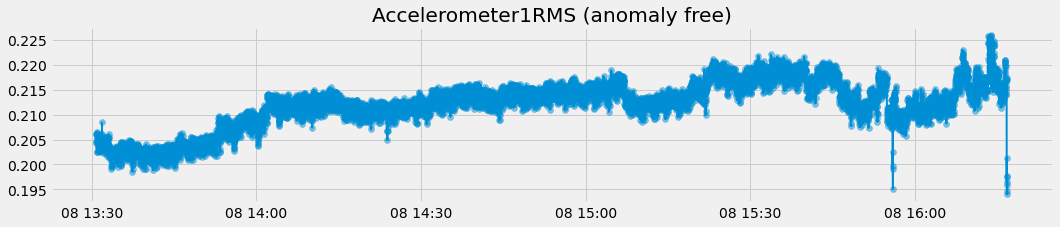

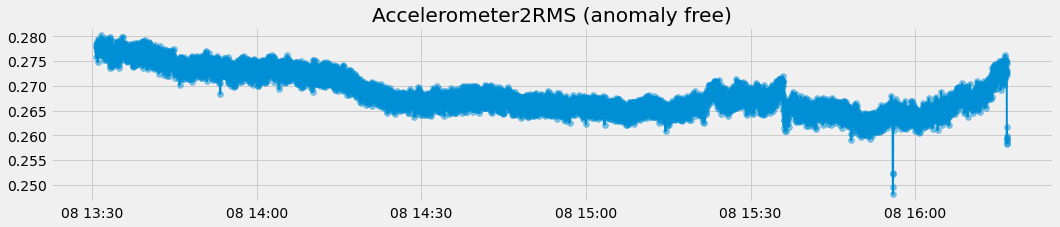

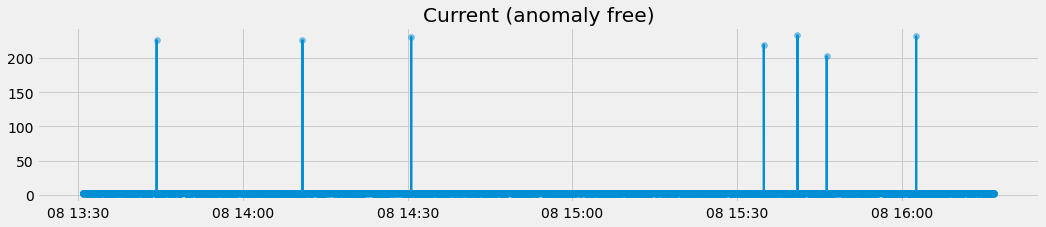

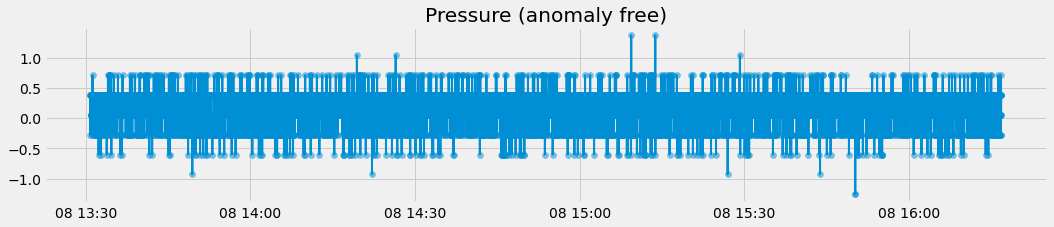

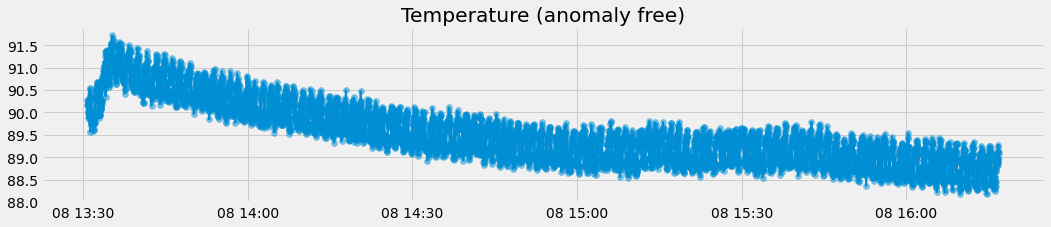

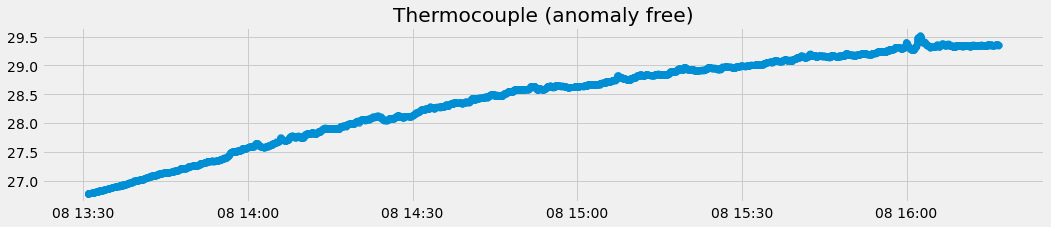

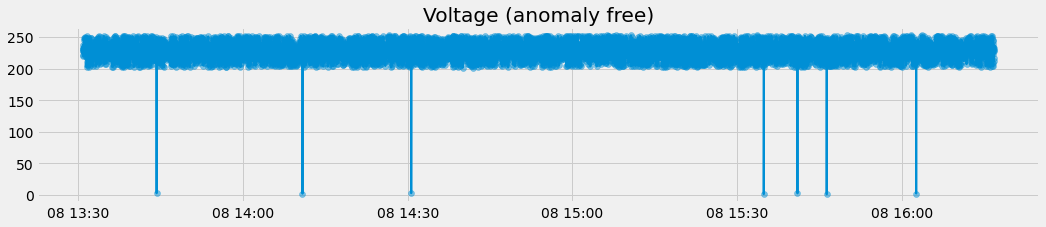

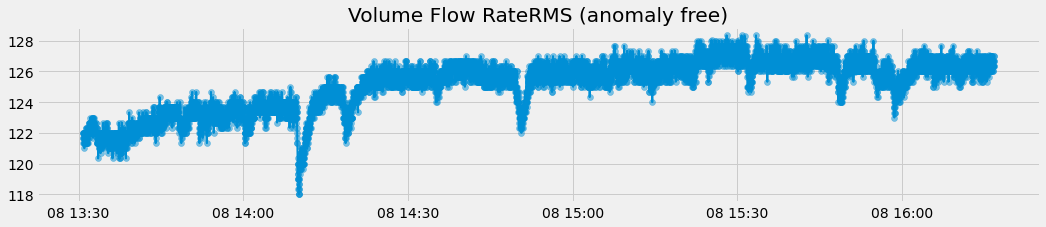

In [15]:
for column in anomaly_free_data.columns:
    fast_plot(anomaly_free_data[column], title=column + ' (anomaly free)', figsize=(16, 3))

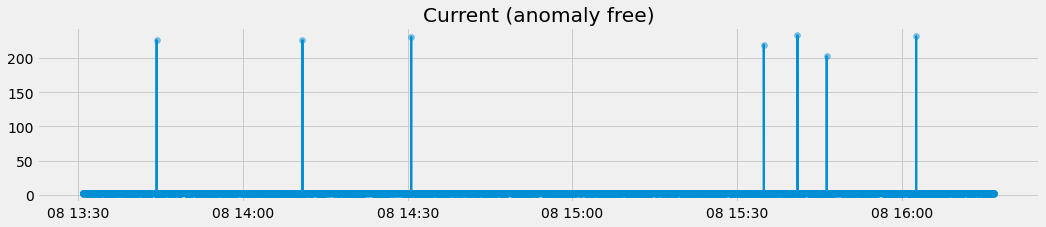

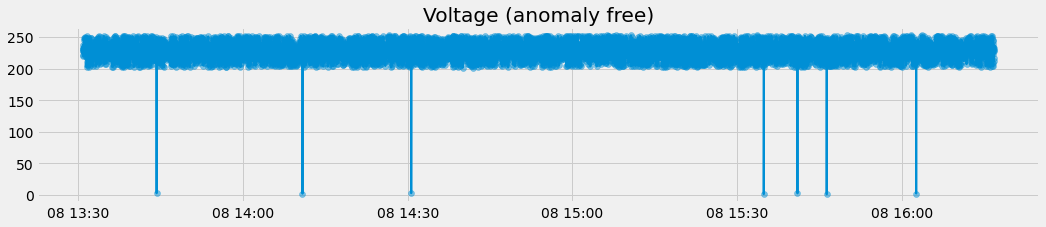

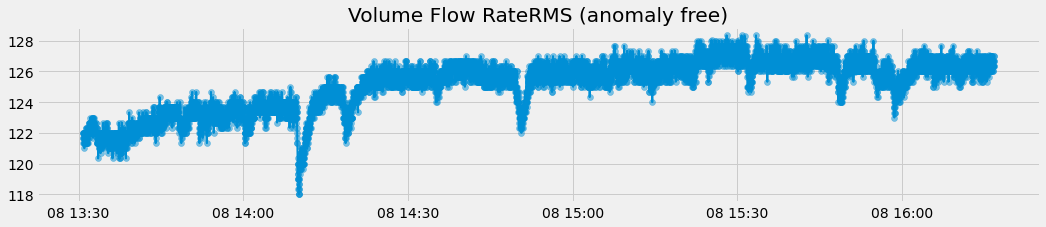

In [50]:
# mask = anomaly_free_data['Current'] < 50
fast_plot(anomaly_free_data['Current'], title='Current (anomaly free)', figsize=(16, 3))
plt.show()
fast_plot(anomaly_free_data['Voltage'], title='Voltage (anomaly free)', figsize=(16, 3))
plt.show()
fast_plot(anomaly_free_data['Volume Flow RateRMS'], title='Volume Flow RateRMS (anomaly free)', figsize=(16, 3))
plt.show()

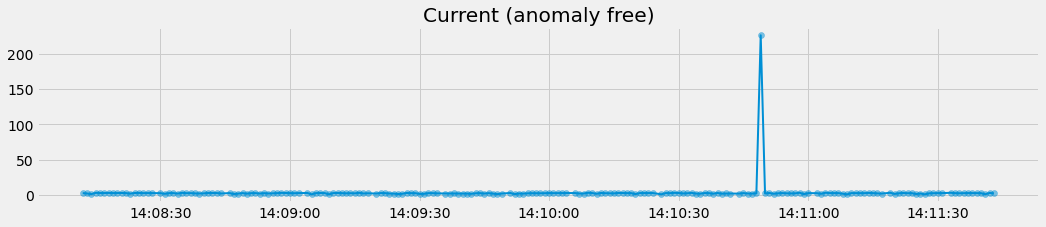

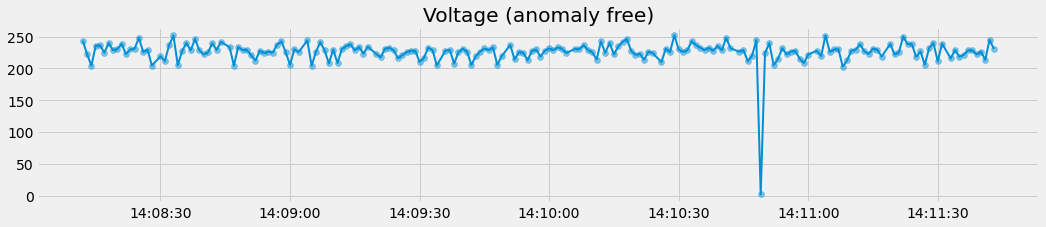

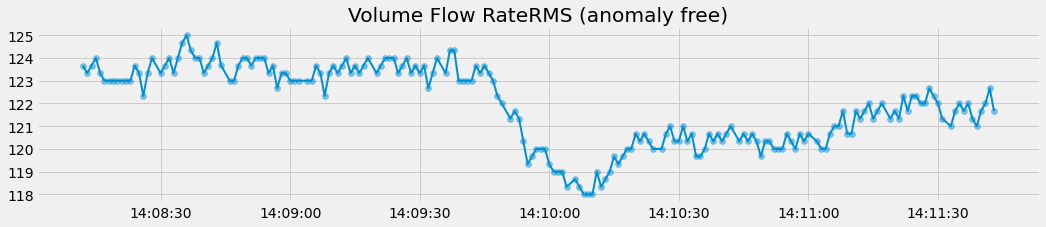

In [51]:
fast_plot(anomaly_free_data['Current'][2100:2300], title='Current (anomaly free)', figsize=(16, 3))
plt.show()
fast_plot(anomaly_free_data['Voltage'][2100:2300], title='Voltage (anomaly free)', figsize=(16, 3))
plt.show()
fast_plot(anomaly_free_data['Volume Flow RateRMS'][2100:2300], title='Volume Flow RateRMS (anomaly free)', figsize=(16, 3))
plt.show()

In [19]:
def current_voltage_correction(data):
    data = data.copy()
    mask = (data['Current'] > 100) & (data['Voltage'] < 100)
    idx = mask[mask].index
    voltage = data['Current'][mask]
    current = data['Voltage'][mask]
    data.loc[idx, 'Current'] = current
    data.loc[idx,'Voltage'] = voltage
    return data

In [21]:
dfs = [anomaly_free_data] + valve1_data + valve2_data + other_data

In [22]:
for i in range(len(dfs)):
    dfs[i] = current_voltage_correction(dfs[i])
    
for i in range(len(valve1_data)):
    valve1_data[i] = current_voltage_correction(valve1_data[i])
    
for i in range(len(valve2_data)):
    valve2_data[i] = current_voltage_correction(valve2_data[i])
    
for i in range(len(other_data)):
    other_data[i] = current_voltage_correction(other_data[i])

Найдем тренды в данных, за все дни проведения эксперимента.

[]

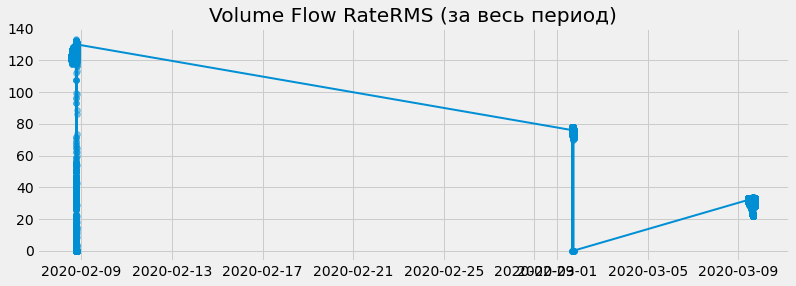

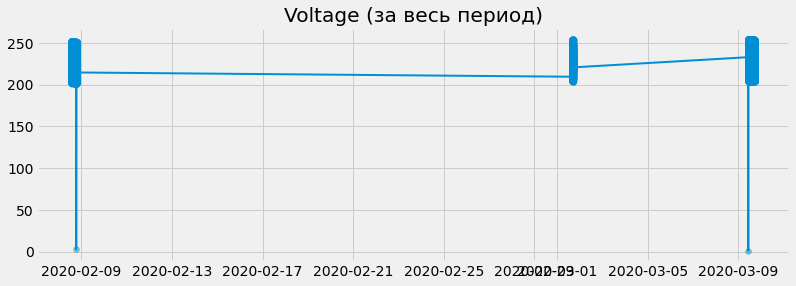

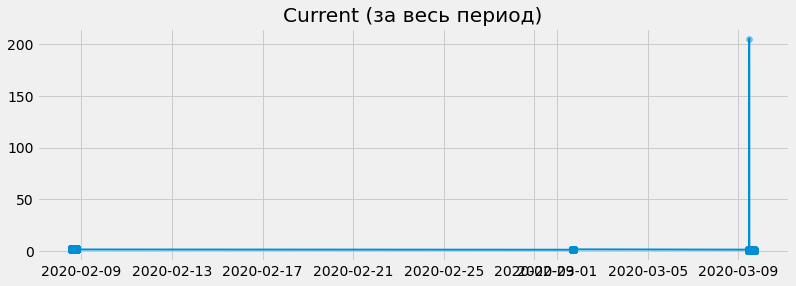

In [55]:
alldata = pd.concat(dfs)
alldata = alldata.sort_index()

fast_plot(alldata['Volume Flow RateRMS'], title='Volume Flow RateRMS (за весь период)')
plt.plot()
fast_plot(alldata['Voltage'], title='Voltage (за весь период)')
plt.plot()
fast_plot(alldata['Current'], title='Current (за весь период)')
plt.plot()

Рассмартривать на таком промежутке не репрезентативно, посмотри на отдельнвх днях, в которых проводились эксперименты.

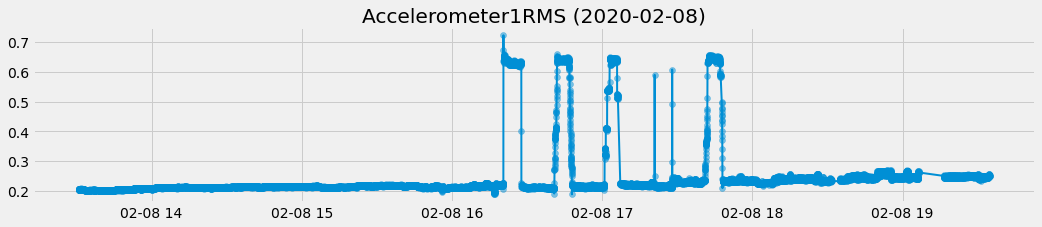

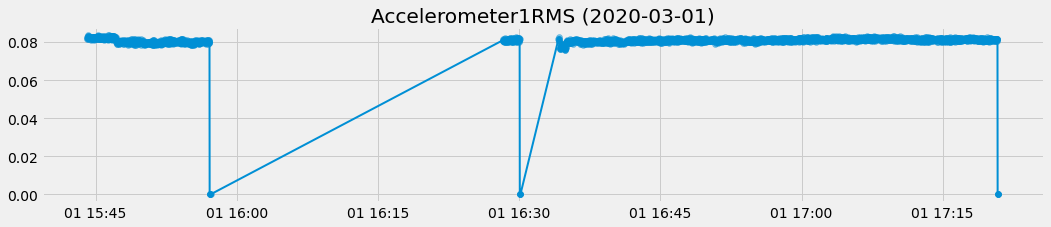

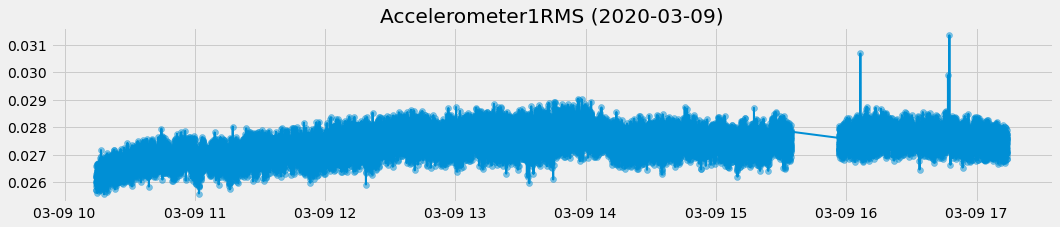

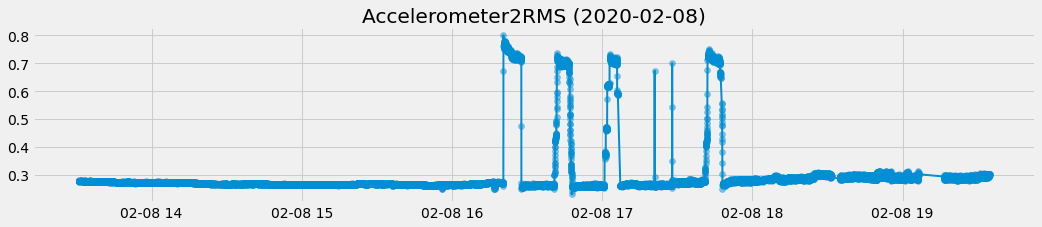

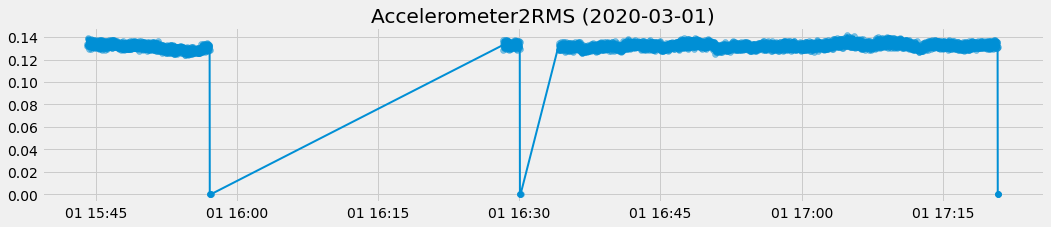

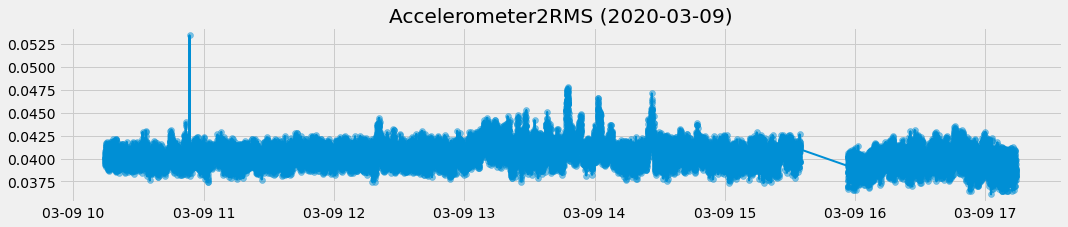

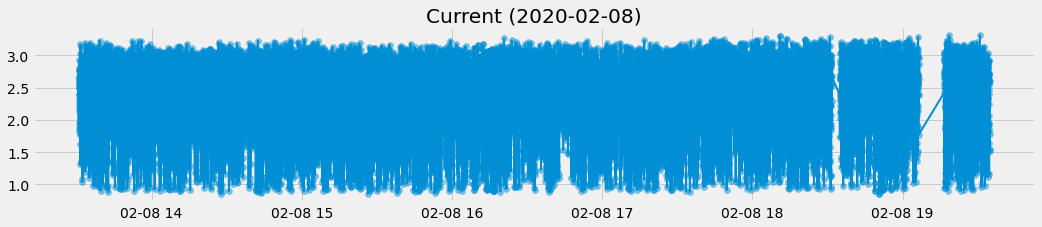

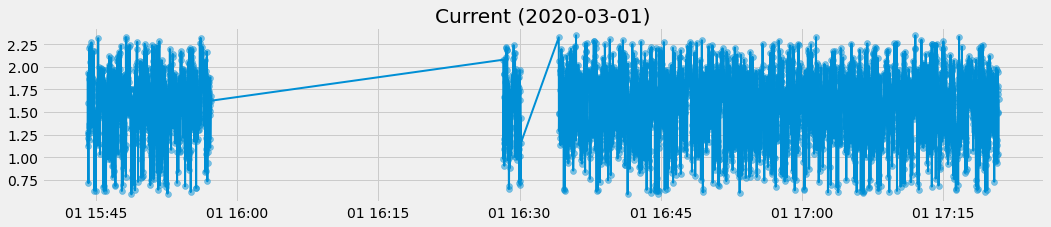

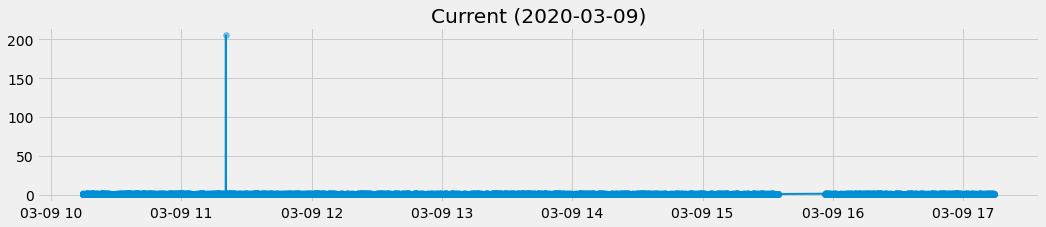

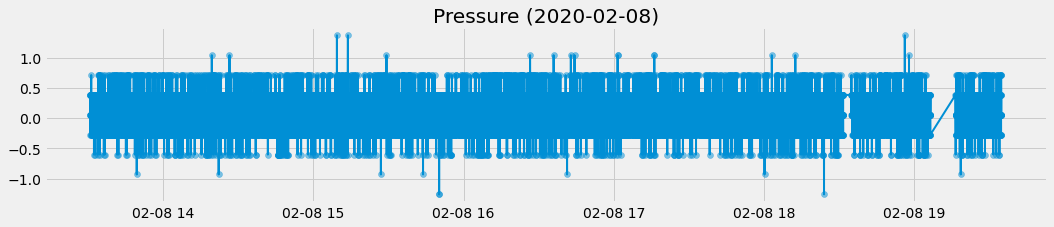

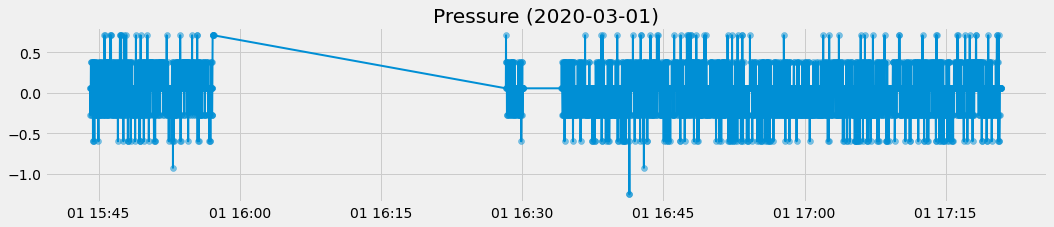

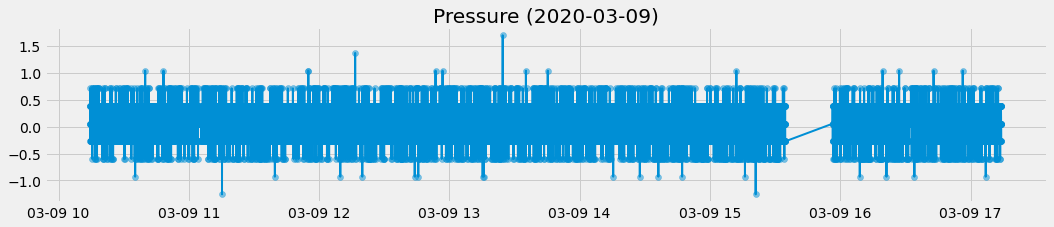

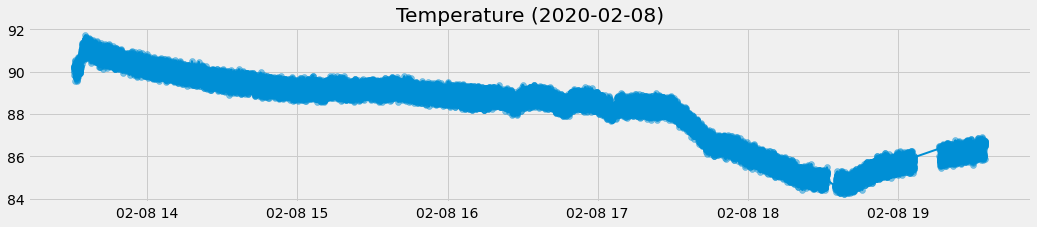

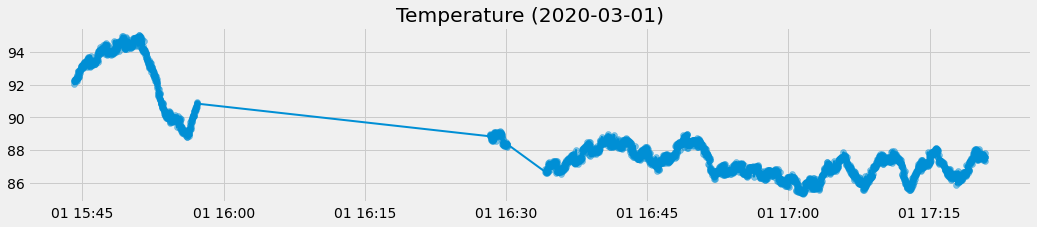

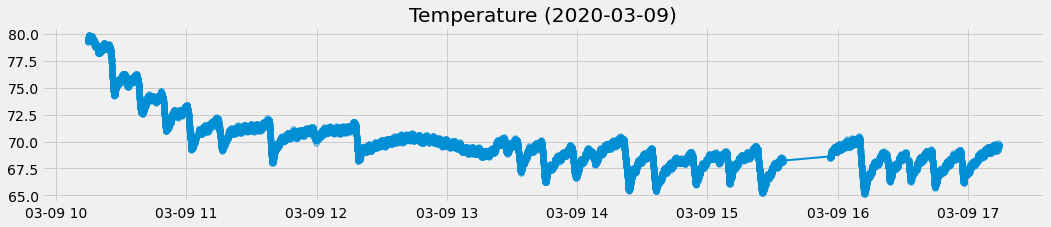

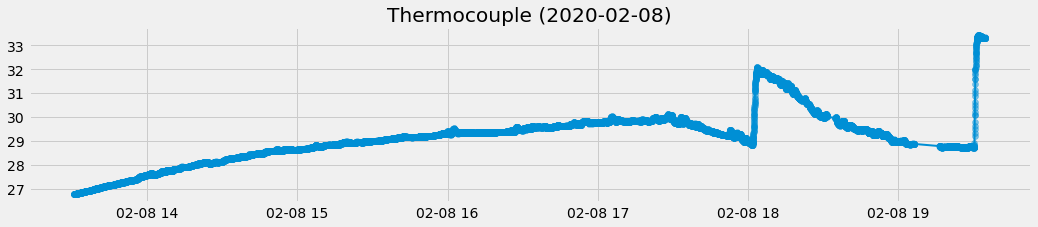

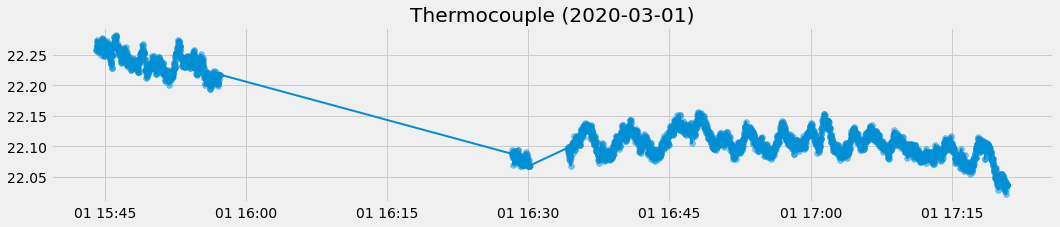

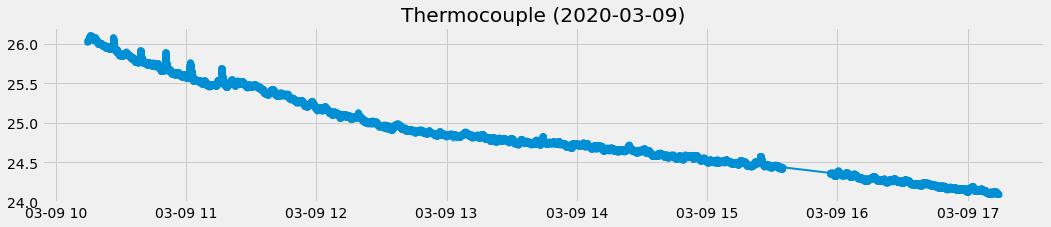

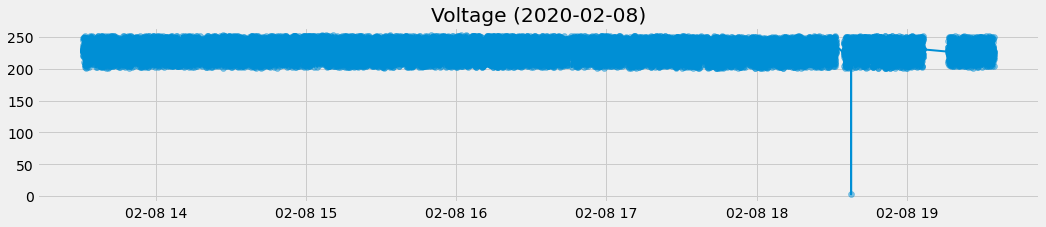

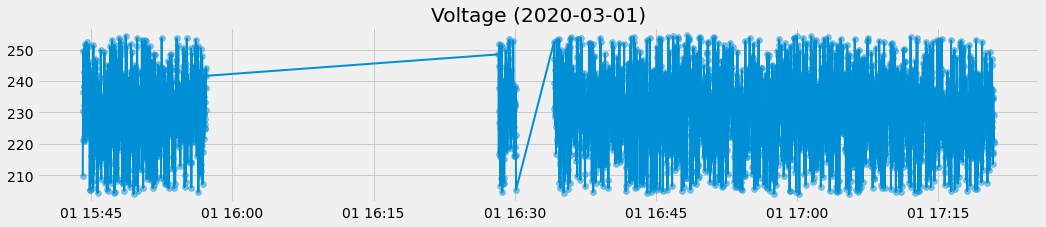

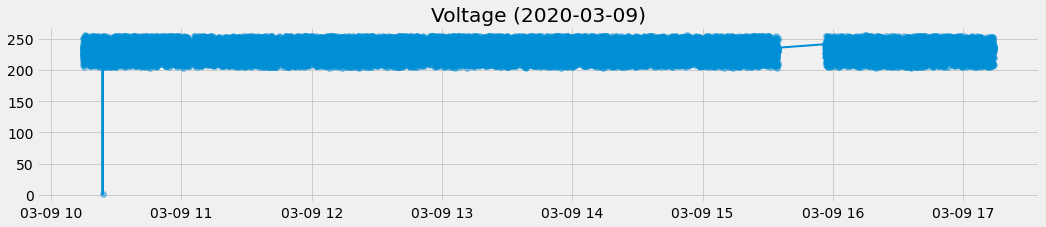

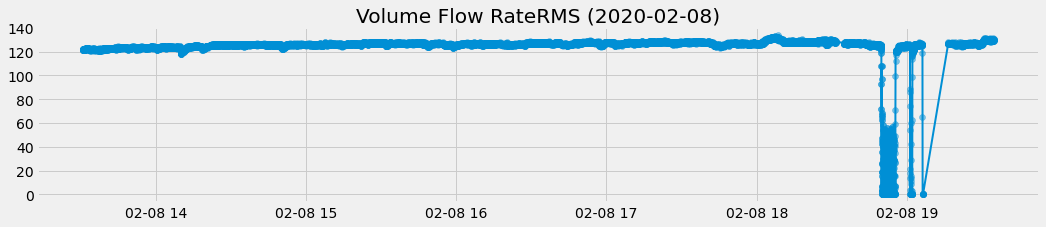

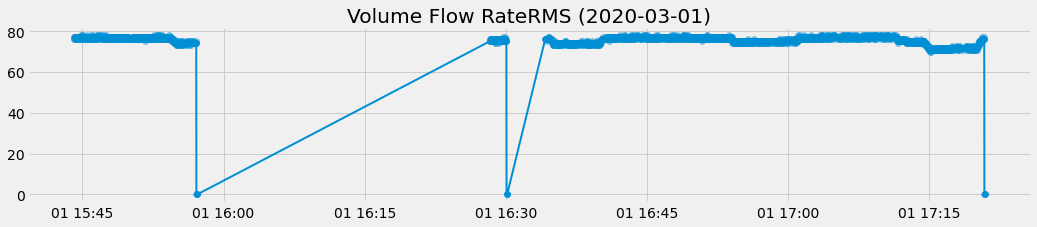

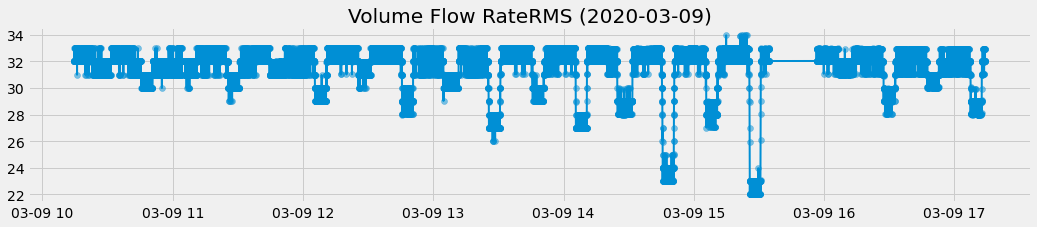

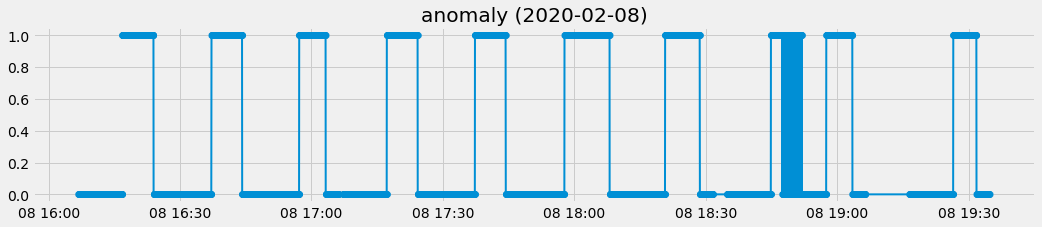

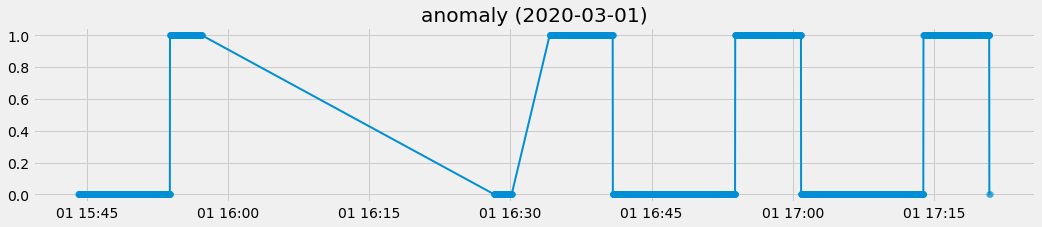

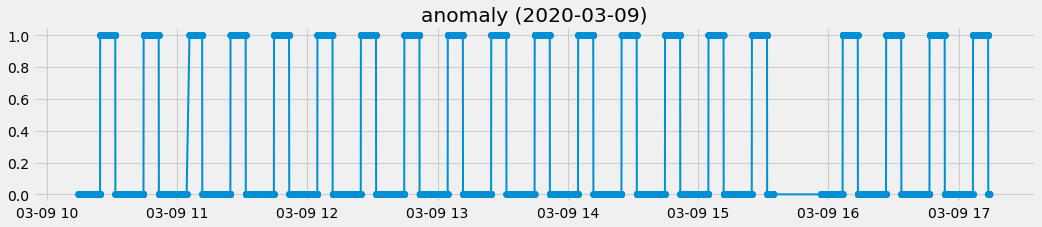

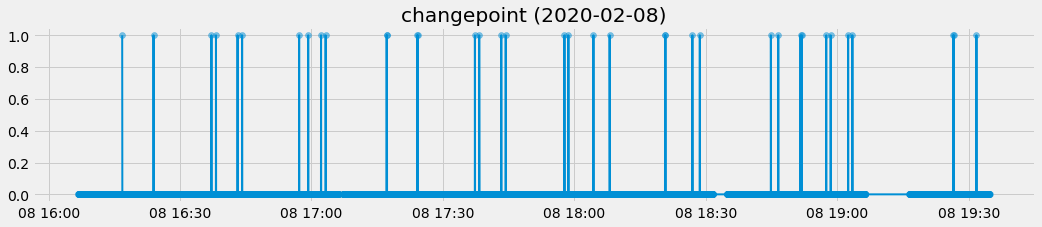

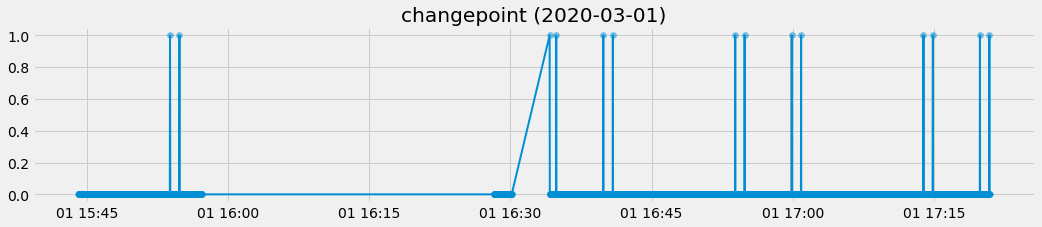

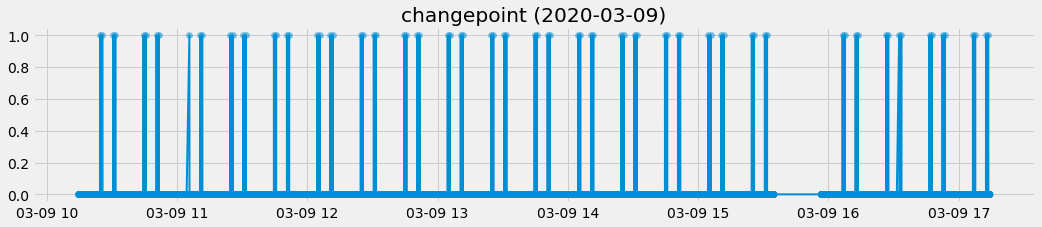

In [24]:
for column in alldata.columns:
    fast_plot(alldata[column]['2020-02-08'], title=column + ' (2020-02-08)', figsize=(16, 3))
    plt.show()
    fast_plot(alldata[column]['2020-03-01'], title=column + ' (2020-03-01)', figsize=(16, 3))
    plt.show()
    fast_plot(alldata[column]['2020-03-09'], title=column + ' (2020-03-09)', figsize=(16, 3))
    plt.show()
    print('\n\n')

Построим сглаженные данные для определения уровня шума данных.

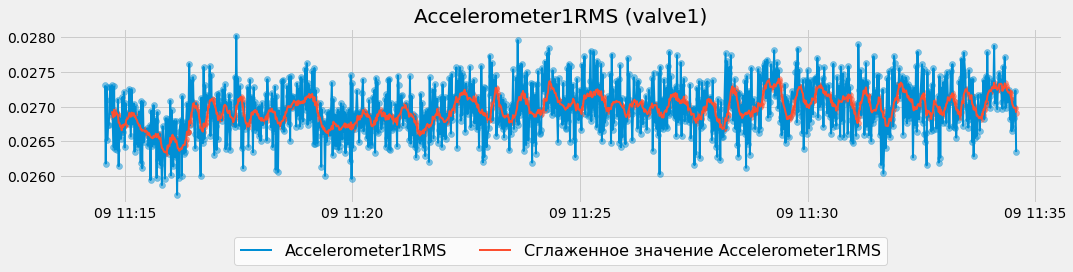

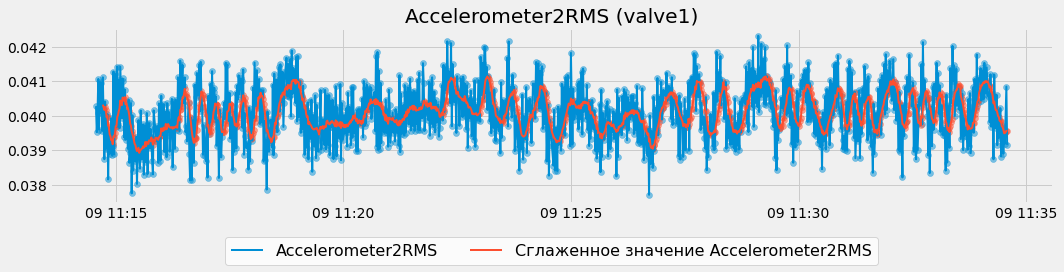

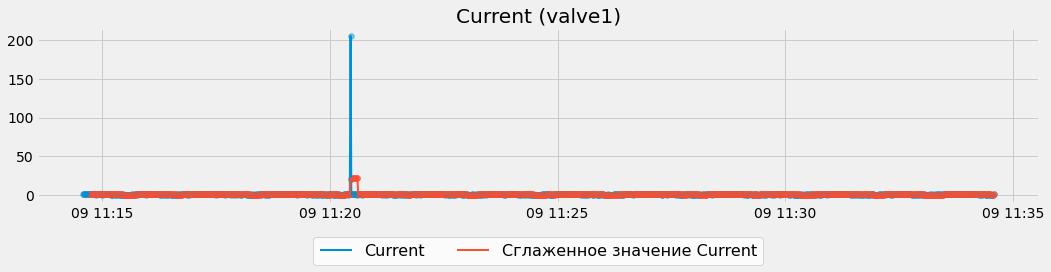

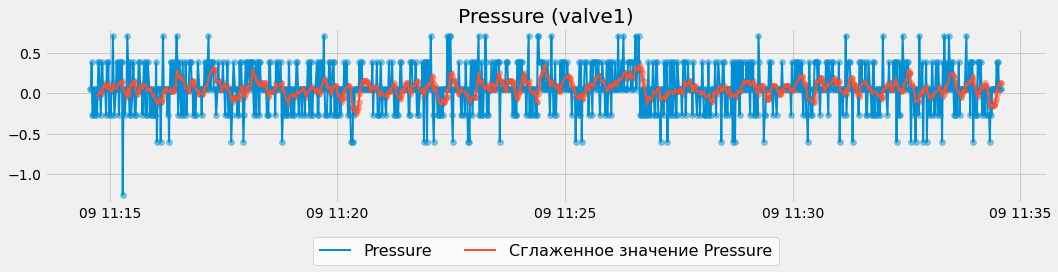

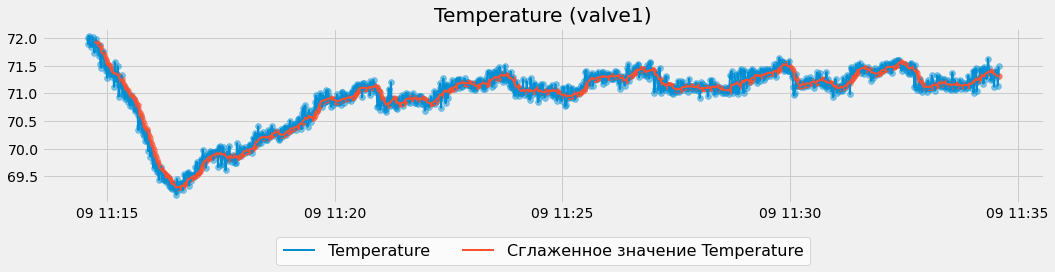

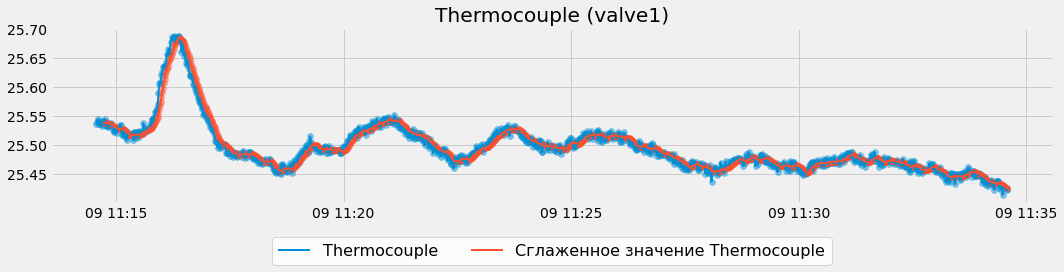

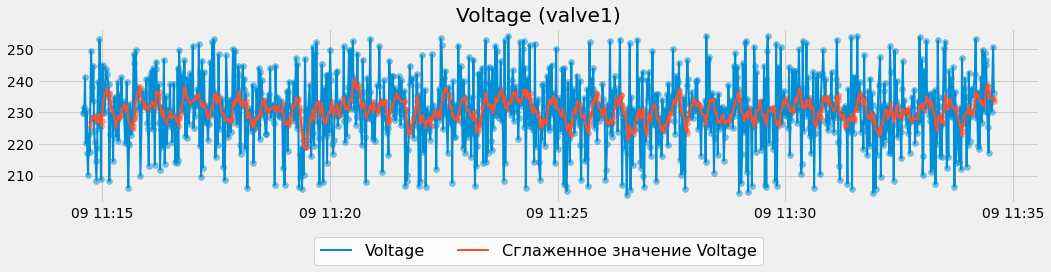

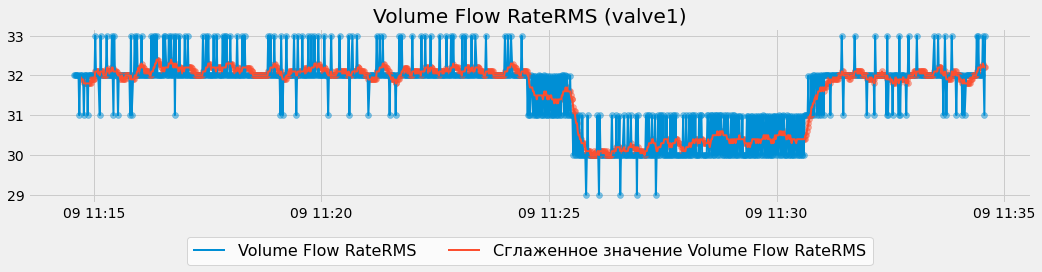

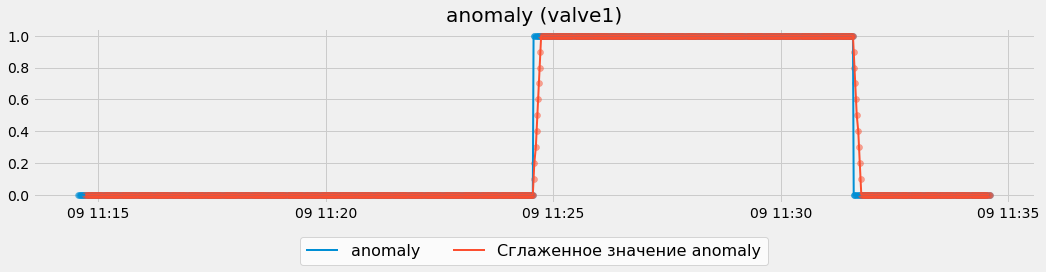

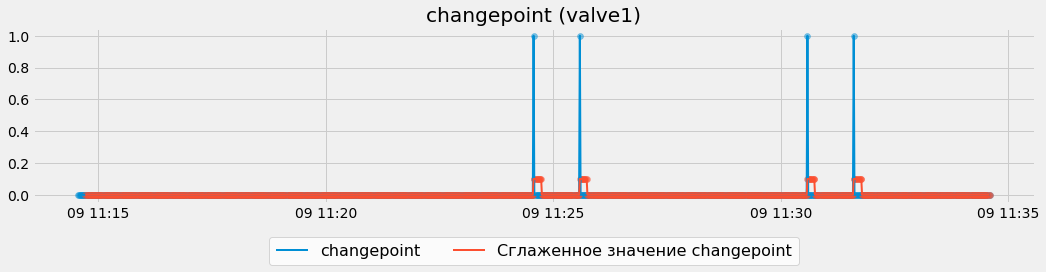

In [56]:
for column in valve1_data[0].columns:
    fast_plot(valve1_data[0][column], title=column + ' (valve1)', figsize=(16, 3), label=column)
    fast_plot(valve1_data[0][column], rolling=10, new_figure=False, label=f'Сглаженное значение {column}')
    fast_legend()